In [1]:
def euler_step(u, f, dt):
    return u+ dt * f(u)

In [2]:
import numpy as np
import math
from matplotlib import pyplot
%matplotlib inline

In [4]:
#Global Parameters
g = 9.81
vt = 30.0
Cd = 1.0/40.0
Cl = 1.0

#Initial Conditions
v0 = vt #starting at trim velocity
thta0 = 0.0 #trajectory angle
x0 = 0.0 #starting x-position
y0 = 1000.0 #starting altitude

In [5]:
def rhs_phugoid(u, Cl, Cd, g, vt):
    v, theta, x, y = u
    rhs = np.array([-g * np.sin(theta) - Cd / Cl * g/vt**2 * v**2, 
                    -g * np.cos(theta)/v+g/vt**2 * v, 
                    v*np.cos(theta),
                   v*np.sin(theta)])
    return rhs

In [8]:
def euler_step(u, f, dt, *args):
    u_new = u + dt * f(u, *args)
    return u_new

In [9]:
T = 100.0 #length of time interval
dt = 0.1 #time step size
N = int(T / dt) + 1 #defines number of timesteps

#Create array to store solution at each t
u = np.empty((N, 4))
#Set IC
u[0] = np.array([v0, thta0, x0, y0])

#Time integration using Euler step method
for n in range(N-1):
    u[n+1] = euler_step(u[n], rhs_phugoid, dt, Cl, Cd, g, vt)

In [10]:
#Obtain Glider's position over time
x = u[:, 2]
y = u[:, 3]

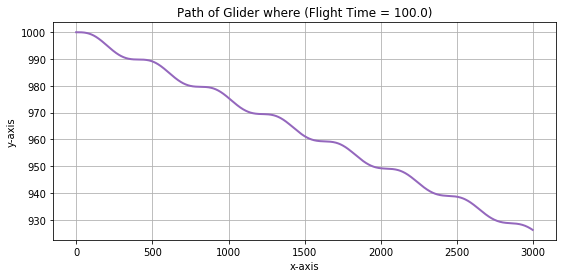

In [13]:
# Plotting path of glider
pyplot.figure(figsize = (9.0,4.0))
pyplot.title('Path of Glider where (Flight Time = {})'.format(T))
pyplot.xlabel('x-axis')
pyplot.ylabel('y-axis')
pyplot.grid()
pyplot.plot(x,y, color='C4', linestyle='-', linewidth=2);

In [15]:
# Set the list of time-step sizes
dt_vals = [0.1, 0.05, 0.01, 0.005, 0.001]

# Generate Empty list that contains solutions for each t-step
u_vals = []

for dt in dt_vals:
    N = int(T / dt) + 1 #num of time-steps
    
    #Create array to store solution at each t-step
    u = np.empty((N, 4))
    
    #Set IC
    u[0] = np.array([v0, thta0, x0, y0])
    
    # Temp. Integration using Euler
    for n in range(N - 1):
        u[n+1] = euler_step(u[n], rhs_phugoid, dt, Cl, Cd, g, vt)
        
    # Store solution for present time-step
    u_vals.append(u)

In [18]:
def l1_diff(u_coarse, u_fine, dt):
    N_coarse = len(u_coarse)
    N_fine = len(u_fine)
    ratio = math.ceil(N_fine / N_coarse)
    diff = dt*np.sum(np.abs(u_coarse - u_fine[::ratio]))
    return diff

In [19]:
diff_vals = []
for i, dt in enumerate(dt_vals[:-1]):
    diff = l1_diff(u_vals[i][:,2], u_vals[-1][:, 2], dt)
    diff_vals.append(diff)

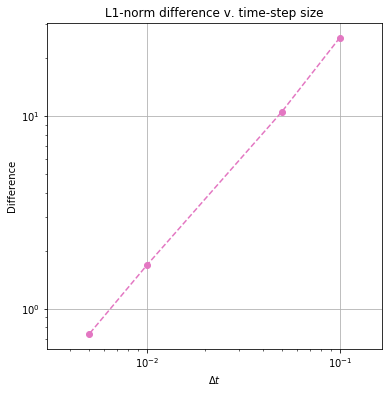

In [22]:
#Plotting Difference v. Time-step size
pyplot.figure(figsize=(6.0,6.0))
pyplot.title('L1-norm difference v. time-step size')
pyplot.xlabel('$\Delta t$') #x-axis label
pyplot.ylabel('Difference') #y-axis label
pyplot.grid()
pyplot.loglog(dt_vals[:-1], diff_vals, color='C6', linestyle = '--', marker = 'o')
pyplot.axis('equal');

In [ ]:
r = 2 #refinement ratio for timestep size
